In [616]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /Users/lucie/opt/anaconda3/lib/python3.8/site-packages (0.1.59)
Note: you may need to restart the kernel to use updated packages.


In [617]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from scipy import stats
from sklearn import linear_model

mpl.style.use('ggplot')

In [618]:
df=pd.read_csv("/Users/lucie/Downloads/reddit_wsb.csv")
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [619]:
#clean data
df.drop(['created','id','url'],axis=1, inplace=True)
df.columns=list(map(str, df.columns))

In [620]:
#check how many NA in each column
df.isna().sum()

title            0
score            0
comms_num        0
body         23179
timestamp        0
dtype: int64

In [621]:
df.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


In [622]:
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df['timestamp']=pd.to_datetime(df['timestamp'])
df['date']=df['timestamp'].dt.date
df['weekday']=df['timestamp'].dt.weekday
df['weekday']=df['weekday'].apply(lambda x: day_name[x])
df['hour']=df['timestamp'].dt.hour
df.head()

,title,score,comms_num,body,timestamp,date,weekday,hour
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021-01-28,Thursday,21
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021-01-28,Thursday,21
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,Thursday,21
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,2021-01-28,Thursday,21
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,2021-01-28,Thursday,21


In [623]:
#wait, when is the data started to be collected?
start_date=min(df['date'])
end_date=max(df['date'])
print(start_date)
print(end_date)

2020-09-29
2021-04-02


In [624]:
#plot threads volume by time
threads_vol_date=df.groupby(['date']).size()
threads_vol_weekday=df.groupby(['weekday']).size()
threads_vol_hour=df.groupby(['hour']).size()
df.drop(df.loc[df['date']== min(df['date'])].index, axis=0, inplace=True)

In [625]:
threads_vol_date

date
2020-09-29        1
2021-01-28     1197
2021-01-29    15694
2021-01-30     1424
2021-01-31      939
              ...  
2021-03-29       66
2021-03-30      101
2021-03-31       84
2021-04-01      138
2021-04-02       78
Length: 66, dtype: int64

In [626]:
threads_vol_d=pd.DataFrame(threads_vol_date,columns =['vol'])
threads_vol_d.head()

,vol
date,
2020-09-29,1
2021-01-28,1197
2021-01-29,15694
2021-01-30,1424
2021-01-31,939


In [627]:
threads_vol_hour

hour
0      1216
1     10069
2      7222
3      3634
4      2161
5      1374
6      1339
7      1656
8      1575
9      1398
10     1287
11     1074
12     1084
13     1164
14     1176
15      945
16      742
17      691
18      449
19      490
20      468
21      554
22      609
23     1815
dtype: int64

In [628]:
threads_vol_weekday

weekday
Friday       20603
Monday        1854
Saturday      5888
Sunday        2287
Thursday      5478
Tuesday       3172
Wednesday     4910
dtype: int64

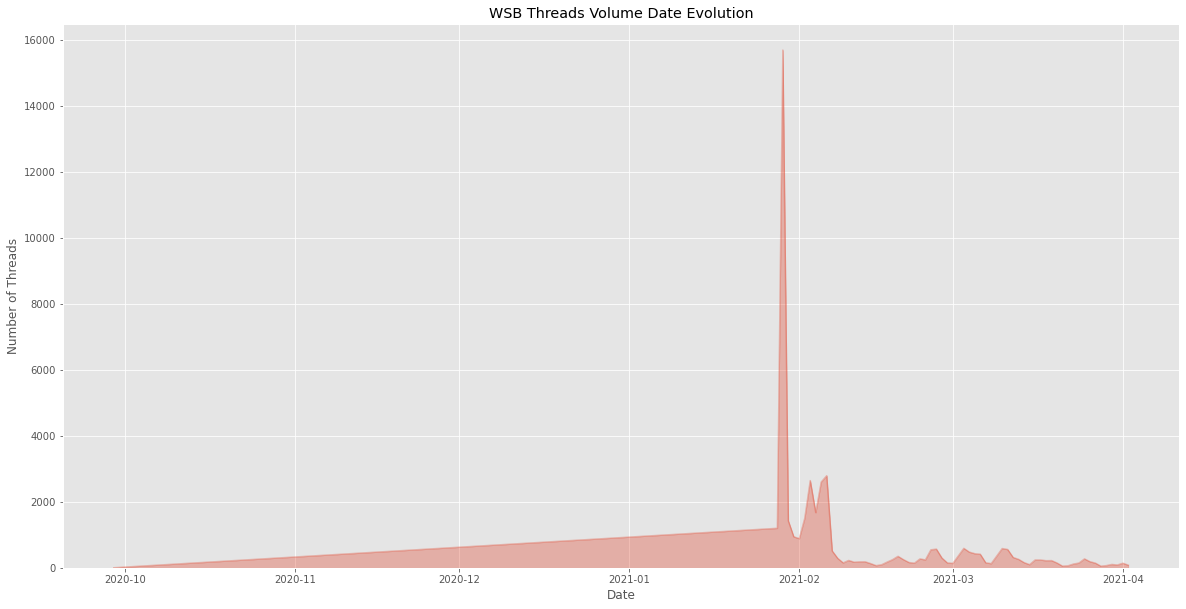

In [629]:
threads_vol_date.plot(kind='area', 
             alpha=0.35, # 0-1, default value a= 0.5
             figsize=(20, 10),
            )

plt.title('WSB Threads Volume Date Evolution')
plt.ylabel('Number of Threads')
plt.xlabel('Date')

plt.show()

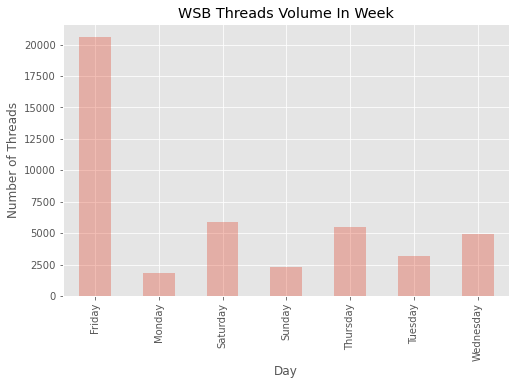

In [630]:
threads_vol_weekday.plot(kind='bar', 
             alpha=0.35, # 0-1, default value a= 0.5
             figsize=(8, 5),
            )

plt.title('WSB Threads Volume In Week')
plt.ylabel('Number of Threads')
plt.xlabel('Day')

plt.show()

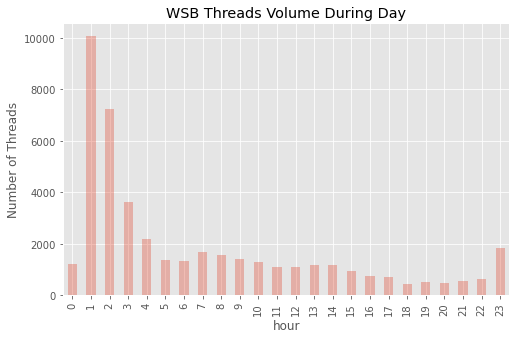

In [631]:
threads_vol_hour.plot(kind='bar', 
             alpha=0.35, # 0-1, default value a= 0.5
             figsize=(8, 5),
            )

plt.title('WSB Threads Volume During Day')
plt.ylabel('Number of Threads')
plt.xlabel('hour')

plt.show()

In [632]:
headline=df['title']
str_headline=headline.to_string(index=False)
type(str_headline)

str

In [633]:
stopwords=set(STOPWORDS)
wsb_wc=WordCloud(
    background_color='white',
    stopwords=stopwords
)
wsb_wc.generate(str_headline)

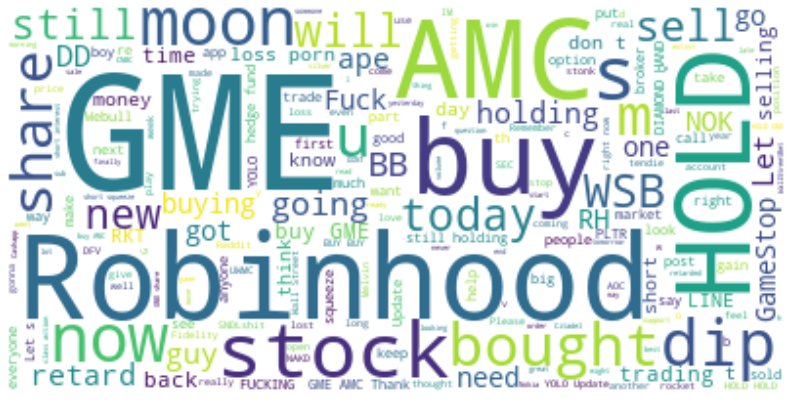

In [634]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wsb_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

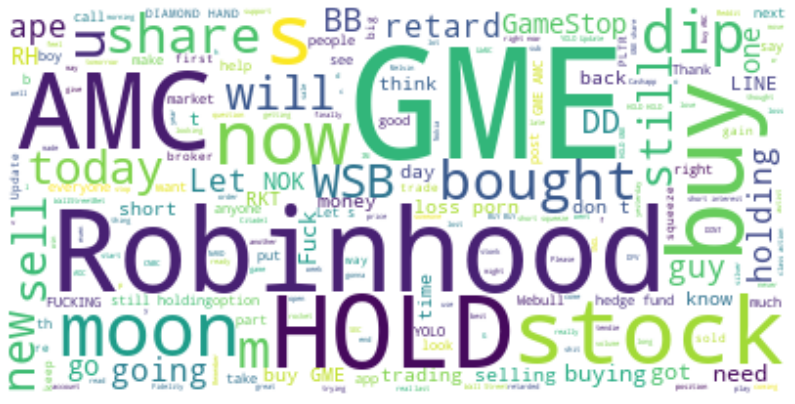

In [635]:
#wordcloud based on body of the treads
body=df['body']
str_body=headline.to_string(index=False)

stopwords=set(STOPWORDS)
wsb_wc_body=WordCloud(
    background_color='white',
    stopwords=stopwords
)
wsb_wc_body.generate(str_body)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wsb_wc_body, interpolation='bilinear')
plt.axis('off')
plt.show()

In [636]:
df["score"] = pd.to_numeric(df["score"])
df["commns_num"] = pd.to_numeric(df["comms_num"])
df_ranked=df.sort_values(by=['score'], ascending=False, axis=0)
df_ranked.head()

,title,score,comms_num,body,timestamp,date,weekday,hour,commns_num
19162,Times Square right now,348241,11554,NaN,2021-01-31 04:00:38,2021-01-31,Sunday,4,11554
16009,GME YOLO update — Jan 28 2021,225870,23309,NaN,2021-01-29 07:06:23,2021-01-29,Friday,7,23309
17771,GME YOLO month-end update — Jan 2021,219779,20105,NaN,2021-01-30 07:04:45,2021-01-30,Saturday,7,20105
34179,GME YOLO update — Feb 19 2021,201168,12846,NaN,2021-02-20 07:05:55,2021-02-20,Saturday,7,12846
18273,It’s treason then,195782,4523,NaN,2021-01-30 09:40:59,2021-01-30,Saturday,9,4523


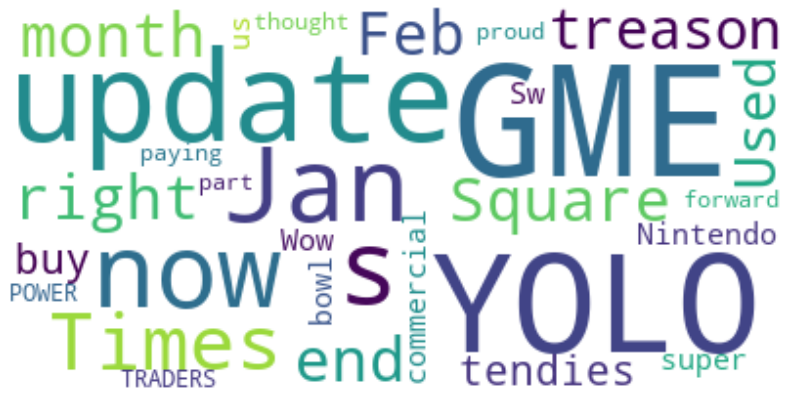

In [637]:
title_top10=df_ranked.head(10)['title']
str_title_top10=title_top10.to_string(index=False)

stopwords=set(STOPWORDS)
wsb_wc_title_top10=WordCloud(
    background_color='white',
    stopwords=stopwords
)
wsb_wc_title_top10.generate(str_title_top10)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wsb_wc_title_top10, interpolation='bilinear')
plt.axis('off')
plt.show()

In [638]:
df_ranked.head()

,title,score,comms_num,body,timestamp,date,weekday,hour,commns_num
19162,Times Square right now,348241,11554,NaN,2021-01-31 04:00:38,2021-01-31,Sunday,4,11554
16009,GME YOLO update — Jan 28 2021,225870,23309,NaN,2021-01-29 07:06:23,2021-01-29,Friday,7,23309
17771,GME YOLO month-end update — Jan 2021,219779,20105,NaN,2021-01-30 07:04:45,2021-01-30,Saturday,7,20105
34179,GME YOLO update — Feb 19 2021,201168,12846,NaN,2021-02-20 07:05:55,2021-02-20,Saturday,7,12846
18273,It’s treason then,195782,4523,NaN,2021-01-30 09:40:59,2021-01-30,Saturday,9,4523


In [639]:
df_nonna_body=df_ranked.dropna()
df_nonna_body.head()

,title,score,comms_num,body,timestamp,date,weekday,hour,commns_num
205,Where do we go from here and who is going to s...,111559,29241,We have grown to the kind of size we only drea...,2021-01-28 10:36:02,2021-01-28,Thursday,10,29241
18418,I get it now. I completely understand why nobo...,95309,9054,I got into $GME very late. I had a couple shar...,2021-01-31 02:35:12,2021-01-31,Sunday,2,9054
35866,They are selling millions of shares from ETFs ...,83582,5138,Full Credit to u/HeyItsPixeL one of the best D...,2021-02-26 00:58:44,2021-02-26,Friday,0,5138
21239,Today wasn’t a bloodbath for $GME or $AMC. WE ...,78412,4911,DD I saw posted elsewhere: hedge funds are try...,2021-02-02 11:05:33,2021-02-02,Tuesday,11,4911
23892,Why the fuck are we acting like we lost? We ma...,75010,5695,Did everyone forget what happened in Thursday?...,2021-02-03 08:34:12,2021-02-03,Wednesday,8,5695


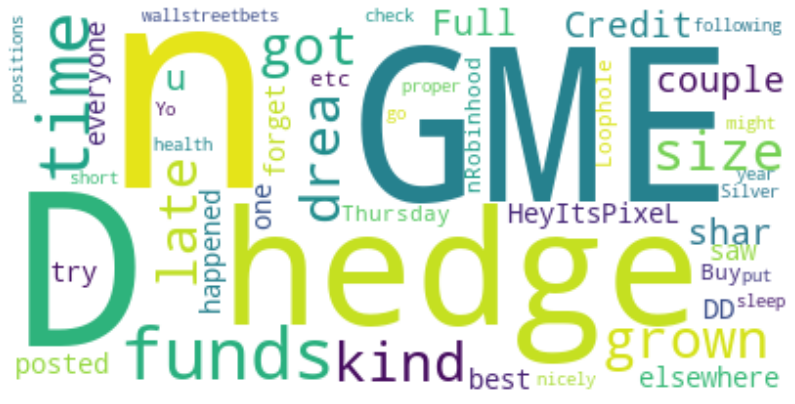

In [640]:
body_top10=df_nonna_body.head(10)['body']
str_body_top10=body_top10.to_string(index=False)

stopwords=set(STOPWORDS)
wsb_wc_body_top10=WordCloud(
    background_color='white',
    stopwords=stopwords
)
wsb_wc_body_top10.generate(str_body_top10)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wsb_wc_body_top10, interpolation='bilinear')
plt.axis('off')
plt.show()

In [641]:
Shares=yf.Ticker('GME')
GME_sp=Shares.history(start=start_date)
GME_sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-28,10.160000,10.260000,9.550000,10.090000,6764300,0,0
2020-09-29,10.000000,10.650000,9.930000,10.350000,5237600,0,0
2020-09-30,10.250000,10.760000,10.060000,10.200000,6079000,0,0
2020-10-01,10.090000,10.250000,9.690000,9.770000,4554100,0,0
2020-10-02,9.380000,9.780000,9.300000,9.390000,4340500,0,0
...,...,...,...,...,...,...,...
2021-03-26,197.679993,218.929993,163.259995,181.000000,37371900,0,0
2021-03-29,180.750000,193.919998,173.509995,181.300003,10042200,0,0
2021-03-30,187.500000,204.300003,182.000000,194.460007,17094900,0,0


In [642]:
#get stock price
Tickers=['GME','AMC']

Shares=yf.Ticker('GME')
GME_sp=Shares.history(start='2021-01-29')
wsb_shares=pd.DataFrame(index=GME_sp.index)

for i in Tickers:
    Shares=yf.Ticker(i)
    wsb_shares[i]=Shares.history(start=start_date)['Open']

wsb_shares.head()



,GME,AMC
Date,,
2021-01-28,265.000000,11.98
2021-01-29,379.709991,14.31
2021-02-01,316.559998,17.00
2021-02-02,140.759995,9.48
2021-02-03,112.010002,8.85


In [643]:
wsb_shares['threads_vol']= threads_vol_d['vol']
wsb_shares_pct=wsb_shares.pct_change()

In [644]:
wsb_shares.max()

GME              379.709991
AMC               17.000000
threads_vol    15694.000000
dtype: float64

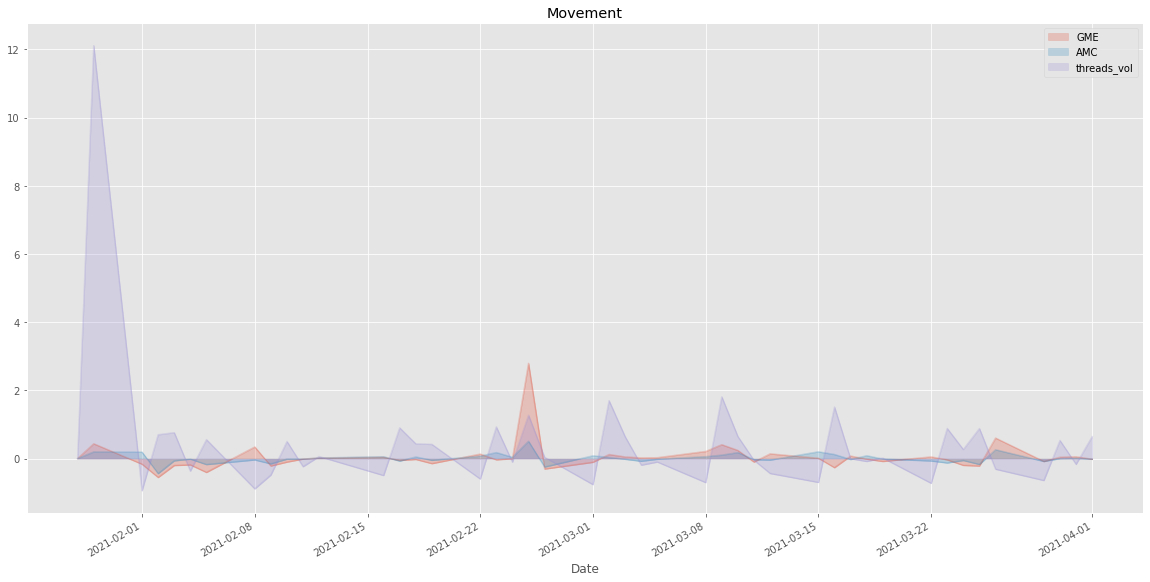

In [645]:
wsb_shares_pct.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Movement')
plt.xlabel('Date')

plt.show()

In [646]:
wsb_shares[wsb_shares['threads_vol']==wsb_shares['threads_vol'].max()].index

DatetimeIndex(['2021-01-29'], dtype='datetime64[ns]', name='Date', freq=None)

In [647]:
wsb_shares_norm=wsb_shares.drop(wsb_shares[wsb_shares['threads_vol']==wsb_shares['threads_vol'].max()].index)
wsb_shares_norm.head()

,GME,AMC,threads_vol
Date,,,
2021-01-28,265.000000,11.98,1197
2021-02-01,316.559998,17.00,884
2021-02-02,140.759995,9.48,1502
2021-02-03,112.010002,8.85,2643
2021-02-04,91.190002,8.70,1671


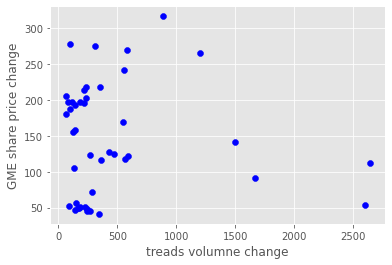

In [648]:
plt.scatter(wsb_shares_norm.threads_vol, wsb_shares_norm.GME, color='blue')
plt.xlabel('treads volumne change')
plt.ylabel('GME share price change')
plt.show()

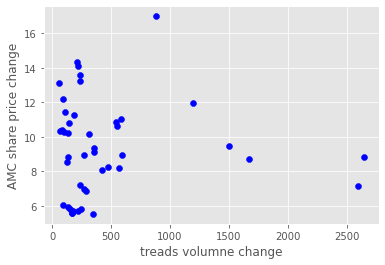

In [649]:
plt.scatter(wsb_shares_norm.threads_vol, wsb_shares_norm.AMC, color='blue')
plt.xlabel('treads volumne change')
plt.ylabel('AMC share price change')
plt.show()

In [650]:
pearson_coef, p_value = stats.pearsonr(wsb_shares_norm['AMC'], wsb_shares_norm['threads_vol'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.005283399090993009  with a P-value of P = 0.9728473346644443


(0.0, 2772.5637034573765)

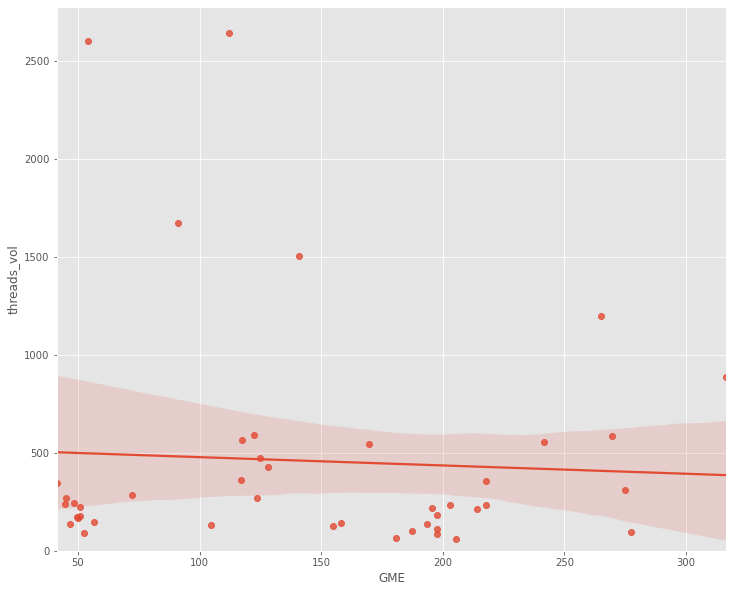

In [651]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GME", y="threads_vol", data=wsb_shares_norm)
plt.ylim(0,)

In [652]:
pearson_coef_amc, p_value_amc = stats.pearsonr(wsb_shares_norm['AMC'], wsb_shares_norm['threads_vol'])
print("The Pearson Correlation Coefficient is", pearson_coef_amc, " with a P-value of P =", p_value_amc)  

The Pearson Correlation Coefficient is -0.005283399090993009  with a P-value of P = 0.9728473346644443


In [653]:
wsb_shares_norm.corr()

,GME,AMC,threads_vol
GME,1.000000,0.879604,-0.056245
AMC,0.879604,1.000000,-0.005283
threads_vol,-0.056245,-0.005283,1.000000


In [654]:
from sklearn.model_selection import train_test_split
x_data=wsb_shares_norm.drop('threads_vol', axis=1)
y_data=wsb_shares_norm['threads_vol']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

Text(0.5, 1.0, 'R^2 Using Test Data')

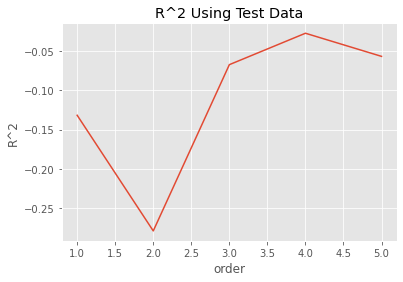

In [655]:
Rsqu_test = []

order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['GME']])
    
    x_test_pr = pr.fit_transform(x_test[['GME']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')  

In [656]:
from sklearn.preprocessing import PolynomialFeatures

In [660]:
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(x_train[['GME']])
x_test_pr=pr.fit_transform(x_test[['GME']])
poly=LinearRegression().fit(x_train_pr,y_train)

In [662]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Share price of GME')
    plt.ylabel('Post volume')

    plt.show()
    plt.close()

/Users/lucie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/lucie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


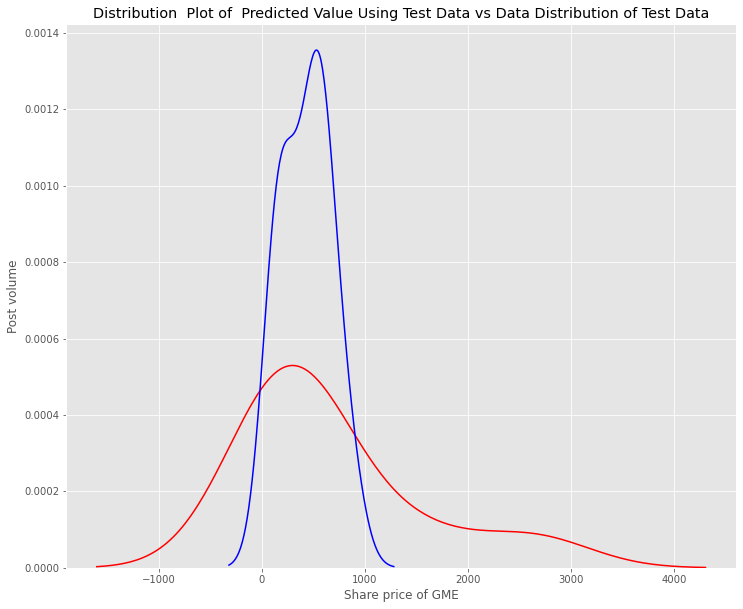

In [663]:
yhat_test=poly.predict(x_test_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)